<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1107%EC%9B%94%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(183_227).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 분류

# 02 결정트리 개요

* 결정트리란, 데이터에 있는 규칙을/ 학습을 통해 자동으로 찾아내/ 트리 기반의 분류 규칙을 만드는 것  
* 적은 결정노드 + 높은 예측정확도 가지려면// 균일한 데이터 세트를 구성하도록/ 분할하게 하는/ 결정노드의 규칙을 정해야 함.
  - 결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙조건을 만듦.
  - 균일도를 측정하는 기준(정보이득지수, 지니계수)을 이용해 데이터 세트를 분할한다. 
  - 정보이득지수가 높거나 지니계수가 낮은 조건을 찾아서/ 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤/ 데이터가 모두 특정 분류에 분할되면// 분할을 멈추고 분류를 결정한다. 

## 1. 결정트리 모델의 특징 

* 장점 
  1. 쉽다. 직관적이다.
  2. 피처의 스케일링이나 정규화 같은 전처리 작업이 필요 없다.
  
* 단점  
  1. 과적합으로 알고리즘의 성능이 떨어진다.  
     완벽한 규칙을 만들지 못하는 경우가 많음에도 불구하고  
     정확도 높이기 위해 조건 추가-> 트리 깊이가 커져 학습모델이 복잡해짐-> 복잡한 모델은 유연한 대처할수 없어 예측성능이 떨어짐
  2. 이러한 한계를 인정하고,  
     트리의 크기를 사전에 제한하는 성능튜닝이 도움됨.

## 2. 결정트리 모델의 시각화

* Graphviz 설치
* Graphviz를 이용해 붓꽃 데이터셋에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해보자.

In [1]:
# 사이킷런은 결정트리 알고리즘인 DecisionTreeClassifier을 제공함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 우선 학습과 예측을 수행

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# 시각화하기 위한 준비

# export_graphviz는 Graphviz가 읽어들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성헤줌
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

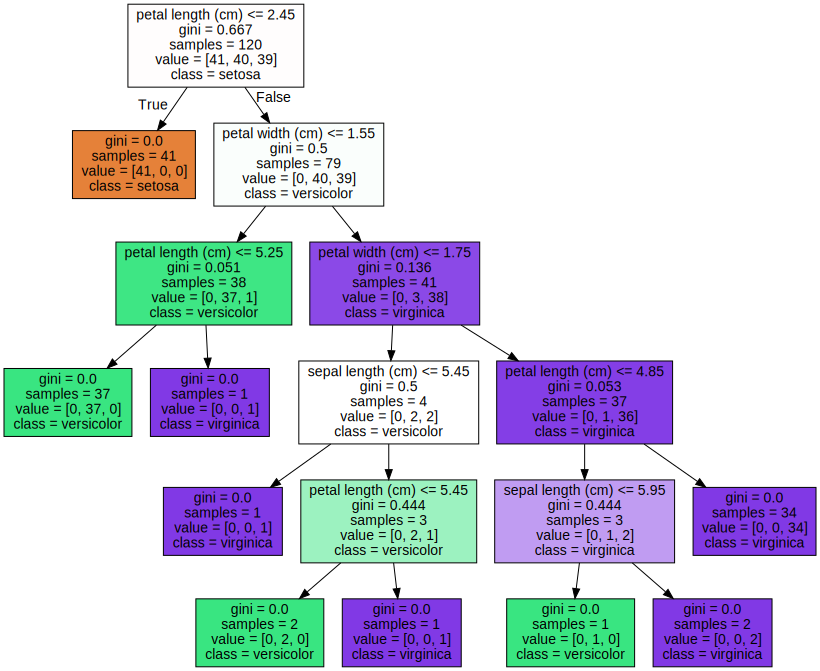

In [4]:
# 시각화하기

# 위에서 생성된 tree.dot파일을 Graphviz가 읽어서 결정트리의 규칙을 시각화
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* 말단 리프노드  
  1. 자식노드가 없는 노드
  2. 최종클래스 값이 결정되는 노드
  3. 하나의 클래스 값으로 최종데이터가 구성되거나, 리프노드가 될 하이퍼 파라미터조건을 충족하면 리프노드가 됨
  4. value=[]는 클래스 값 기반의 데이터 건수  
    ex. value=[0,37,0] : 클래스 값 0인 Setosa 0건, 클래스 값 1인 Versicolor 37건, 클래스 값 2인 Virginica 0건
```
# 자식노드를 만들기 위한 규칙조건이 없음       
gini = 0.0 #지니계수가 0으로 매우 작아서 말단노드
samples = 41 #현 규칙에 해당하는 데이터 건수
value = [41, 0, 0] #0클래스에 41개의 데이터
class = setosa #setosa의 개수가 제일 많다. 
```



* 브랜치 노드
  1. 자식노드가 있는 노드
  2. 자식노드를 만들기 위한 분할규칙조건을 가지고 있음.  
    ex. petal width (cm) <= 1.55
```
petal width (cm) <= 1.75 #자식노드를 만들기 위한 규칙조건이 있음
gini = 0.136 #지니계수가 0.136으로 더 작은 지니계수를 가진 하위노드를 만들수 있음
samples = 41 #현 규칙에 해당하는 데이터 건수
value = [0, 3, 38] #1클래스에 3개의 데이터, 2클래스에 38개의 데이터
class = virginica #하위노드를 가질 경우에 virginica의 개수가 제일 많다.
```



* 각 노드의 색깔은 붓꽃 데이터의 레이블 값  
  주황색: Setosa, 초록색: Versicolor, 보라색: Virginica
* 색깔이 짙어질수록 지니계수가 낮고, 해당 레이블에 속하는 샘플 데이터가 많다.


## 3. 결정트리 파라미터

1. min_samples_split  
  : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨  
2. min_samples_leaf  
  : 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
3. max_features  
  : 최적의 분할을 위해 고려할 최대 피쳐 개수. 
4. max_depth  
  : 트리의 최대 깊이를 규정 
5. max_leaf_nodes  
  : 말단 노드(Leaf)의 최대 개수

* 4번노드에서 value = [0, 37, 1]인 노드를 37, 1에 대해서 클래스를 다시 구분하기 위해 다시 자식노드를 생성한다. 
* 규칙생성로직을 미리 제어하지 않으면/ 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어가게 되어// 매우 복잡한 규칙 트리가 만들어져 과적합되는 문제점을 가지게 된다. 
* 따라서 결정트리 알고르짐의 대부분의 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도이다. 

* 주요 파라미터 설명
  1. max_depth
    - 결정 트리의 최대 트리 깊이를 제어한다.
    - max_depth=3 : 생성되는 노드의 개수x 노드의 층수o 3개로
  2. min_samples_splits
    - 자식규칙노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수 
    - min_samples_splits=4 : 자식노드로 분할하려면 최소샘플개수가 4개는 필요한데, 
    3개 밑이면 더이상 자식규칙노드를 위한 분할하지 않고 리프노드가 됨. 
  3. min_samples_leaf
    - 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값
    - 1개 종류의 클래스로만 돼있거나, 1개 데이터로만 돼있을 경우 리프노드가 될 수 있음
    - min_samples_leaf 값을 키우면, 더이상 분할하지 않고 리프노드가 될 수 있는 조건이 완화됨 
    - min_samples_leaf=4 : 샘플이 4이하이면 지니계수값이 크더라도 리프노드가 됨

* feature_importances_
  * 결정트리는 균일도에 기반해 어떠한 속성을 규칙조건으로 선택하느냐가 중요함  
  ex. 규칙조건 : petal length (cm) <= 2.45  
  * 이 규칙을 정하는 데 있어 피처의 중요한 역할지표를 DecisionTreeClassifier 객체의 feature_importances_ 속성으로 제공한다.
  * feature_importances_ 값이 높을수록 해당 피처의 중요도가 높다는 의미

(참고)  
data : feature 데이터를 가짐  
features_name : feature데이터의 열이름을 가짐  
->feature : 독립변수 X 의 개념  


---


target : label 데이터를 가짐  
target_names : label데이터의 열이름을 가짐  
->label : 종속변수 Y의 개념 (범주형 종속변수)  

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


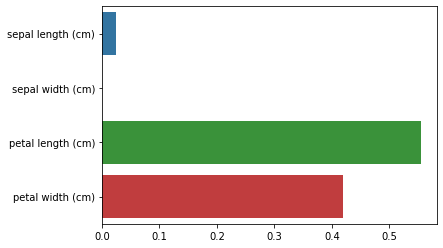

In [6]:
# 위에서 fit()으로 학습된 DTC객체 변수인 df_clf에서/ feature_importances_속성을 가져와/ 피처별로 중요도 값을 매핑하고/ 이를 막대그래프로 표현해보자

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

```
Feature importances:
[0.025 0.    0.555 0.42 ]  #피처중요도가 리스트로 취합되어있음
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555  #피처중요도가 제일 높음
petal width (cm):0.420
```
- 피처(독립변수 X)별로 중요도 도출
- petal length의 피처중요도가 제일 높다.
- 따라서 최초의 규칙조건(petal length (cm) <= 2.45)이 petal length가지고 만들어진것임.


## 4. 결정트리 과적합

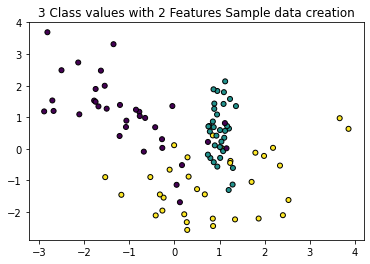

In [7]:
## 결정트리가 학습데이터를 분할해 예측을 수행할 때 나타나는 과적합 문제 시각화하기

## 1. 결정트리로 분류과정을 진행할 샘플 데이터를 준비
from sklearn.datasets import make_classification 
# 사이킷런중 분류를 위한 테스트데이터를 쉽게 만들도록 하는 함수 : make_classification()
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')


* 그래프 분석  
1) X1, X2 데이터의 산점도  
2) 가로축이 X1, 세로축이 X2 데이터  
3) Y=0/1/2 3개의 클래스를 색깔로 구분  

In [8]:
# 머신러닝 모델이 클래스 값을 예측하는 결정기준을 색상과 경계로 나타내, 모델이 어떻게 데이터셋을 예측분류하는지 이해할 수 있게 해주는 함수 정의

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

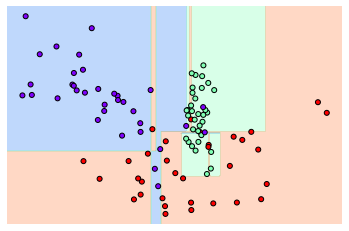

In [9]:
# 2. 결정트리 학습
# 2-1. 결정트리 생성에 별다른 제약이 없도록 결정트리의 하이퍼 파라미터를 디폴트값으로

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성에 제약이 없는 결정트리의 학습
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
# 결정경계 시각화
visualize_boundary(dt_clf, X_features, y_labels)

* 그래프 분석  
1) 파랑색 클래스, 빨강색 클래스, 초록색 클래스로 분류  
2) 파랑색 상자에서 붉은 선, 빨강색 상자에서 파란 선, 초록색상자에서 붉은 선에 있는 점들이 이상치임  
3) 색깔과 경계로 나타내서 분류예측결과가 잘보임

* 문제점  
1) 하이퍼 파라미터의 디폴트값 설정은 리프노드 안 데이터가 균일하거나 하나만 존재해야하는 엄격한 분할기준을 가짐  
2) 그래서 이상치까지 분류하기 위해 분할이 자주 일어나고, 결정기준 경계가 많아져서 모델이 복잡해짐  
3) 이렇게 복잡한 모델에 약간만 다른 데이터셋을 예측시키면 예측정확도가 떨어짐

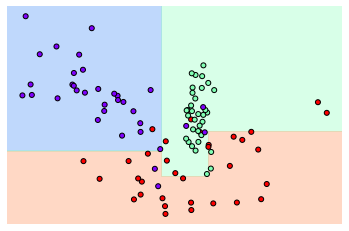

In [10]:
# 2. 결정트리 학습
# 2-2. 결정트리 모델의 하이퍼 파라미터인 min_sample_leaf=6 로 설정.
# 6개 이하의 데이터는 리프 노드를 생성할 수 있음 

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

* 그래프 분석  
1) 이상치에 크게 반응하지 않으면서 더 일반화된 분류규칙에 따라 분류됨 


* 결과  
1) 첫번째 모델보다 두번째 모델의 성능이 더 뛰어날 가능성이 높다  
2) 첫번째 모델은 학습데이터셋에만 지나치게 최적화된 분류기준을 가지게 되어(과적합)  
  테스트테이터셋에서 정확도를 떨어뜨릴 수 있기 때문

# 03 앙상블 학습 개요

* 앙상블 학습을 통한 분류  
1. 정의: 여러개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법  
2. 정형 데이터 분류에 뛰어난 성능을 나타냄  
3. 앙상블 알고리즘의 대표 : 랜덤포레스트, 그래디언트 부스팅  
  
4. 앙상블 학습의 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting)  
  A) 보팅 : 하나의 데이터 샘플링 내에서, 서로다른 알고리즘을 가진 여러 분류기가 투표를 통해 최종 예측결과 결정  
  B) 배깅 : 데이터 샘플링을 서로 다르게, 같은유형의 알고리즘을 가진 여러 분류기가 투표를 통해 최종 예측결과 결정  
  ex. 랜덤 포레스트  
  C) 부스팅 : 여러개의 분류기가 순차적으로 학습수행함.  
  앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록  
  다음 분류기에는 가중치를 분여하면서 학습과 예측을 진행  
  예측 성능이 뛰어나 앙상블 학습을 주도함  
  ex. 그래디언트 부스트, XGBoost


## 1. 보팅 유형
  a) 하드보팅 : 다수결 원칙과 비슷, 예측한 결과값 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정  
  b) 소프트보팅 : 각각의 분류기들이 도출한 레이블값 결정확률을 더해서 평균 내고, 이들 중 확률이 높은 레이블 값을 최종 보팅 결과값으로 선정  
  일반적으로 소프트 보팅이 보팅방법으로 적용됨

## 2. 보팅 분류기

In [11]:
# 필요한 모듈 로딩
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 위스콘신 유방암 데이터셋 가지고 예측분석
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 데이터셋 분석  
1) 유방암의 악성종양(암), 양성종양(쉽게치유되는종양)을 결정하는 이진분류 데이터셋  
Y=0(악성종양), 1(양성종양)  
2) 종양의 크기, 모양 등 형태와 관련된 피처(X)를 가짐


In [12]:
## 로지스틱 회귀와 KNN 기반으로 보팅 분류기 생성

# 개별 모델은 로지스틱회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

## VotingClassifier 함수의 주요 인자
## 1. estimators : 분류기 객체들에 관한 정보를 담은 리스트(알고리즘 유형, 알고리즘을 입력받은 객체이름)를 모아서 튜플형식[(리스트1), (리스트2)]으로 입력받는다. 
## 2. voting : hard=하드보팅(기본값), soft=소프트보팅
# 개별 모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for cf in classifiers:
  cf.fit(X_train, y_train)
  pred = cf.predict(X_test)
  class_name = cf.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


* 결과 분석  
1) 로지스틱회귀 분류기, KNN 분류기를 기반 분류기라고 하고, 여러 기반 분류기를 결합한 것이 보팅 분류기라고 함  
2) 여기서는 기반 분류기보가 보팅 분류기의 정확도가 더 높게 나왔지만, 무조건 보팅분류기가 기반분류기보다 예측성능이 향상되는 것은 아님  
3) 결정트리 알고리즘은 쉽고 직관적이지만 과적합이 발생할 수 있는데, 앙상블 학습에서는 많은 분류기를 결합해 다양한 상황을 학습함으로써 위 단점을 극복함

# 04 랜던 포레스트 개요

## 1. 랜덤포레스트 개요 및 실습


B) 배깅 : 데이터 샘플링을 서로 다르게, 같은유형의 알고리즘을 가진 여러 분류기가 투표를 통해 최종 예측결과 결정  
ex. 랜덤 포레스트

* 랜덤포레스트는 여러개의 결정트리 분류기가 전체데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 함
* 개별트리가 학습하는 서브데이터는, 여러 데이터셋이 중첩되게 분리하는 부트스트래핑 방식으로 만들어진다. 
* 데이터가 중첩된 개별 데이터세트에 결정 트리 분류기를 각각 적용함


In [20]:
## 랜덤 포레스트 기반의 분류 수행하기

# 1. 사용자 행동 인식 데이터 세트를 위한 함수 정의
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 4장의 Human Activity Record 데이터 세트가 중복된 컬럼명을 가지고 있습니다. 
## 판다스 버전이 업그레이됨에 따라 더 이상 중복된 컬럼명을 허용하지 않으므로 신 버전의 판다스에서는 Duplicate column 오류가 발생합니다.
## get_new_feature_name_df() 를 새롭게 생성하고, 이를 get_human_dataset( )에서 이용하는 방식으로 소스코드를 변경

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/PyColab_ESAA/데이터셋/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [21]:
# 학습/테스트용 데이터 프레임 반환
X_train, X_test, y_train, y_test = get_human_dataset()

In [23]:
# 랜덤 포레스트 학습 및 별도의 테스트세트로 예측성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


* 결과 분석  
  랜덤 포레스트는 사용자 행동 인식 데이터셋에 대해 91.08%의 정확도를 보여준다.

## 2. 랜덤 포레스트의 하이퍼 파라미터와 튜닝

* 트리 기반의 앙상블 알고리즘의 단점은 하이퍼 파라미터가 너무 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다.
* 랜덤포레스트의 하이퍼파라미터는 비교적 적은 편에 속한다.   
  결정트리에서 사용되는 하이퍼파라미터와 같은 파라미터가 대부분이기 때문.

In [27]:
from sklearn.model_selection import GridSearchCV

params = {
    #'n_estimator':[100], #결정트리의 개수 디폴트는 10
    'max_depth':[6,8,10,12], #최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 루트(전체피처개수)
    'min_samples_leaf':[8,12,18], #말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
    'min_samples_split':[8,16, 20] #노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨
}

# RandomForestClassifier 객체 생성후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 :{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8}
최고 예측 정확도 :0.9180


In [33]:
# RandomForestClassifier 객체 생성후 GridSearchCV 수행
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8,
                                random_state=0, n_jobs=-1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(accuracy_score(y_test, pred))

0.9165252799457075


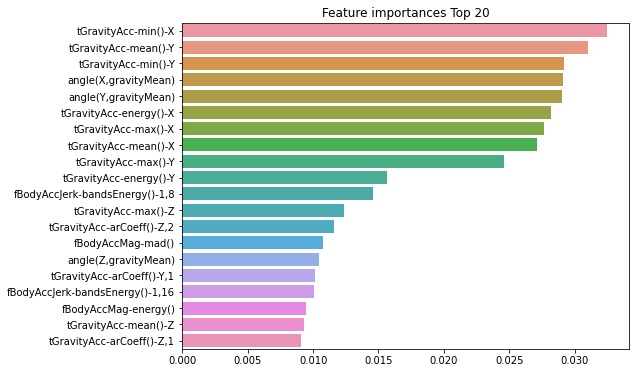

In [34]:
## 알고리즘이 선택한 피처의 중요도

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()


# 05 GBM (Gradient Boosting Machine)

## 1. GBM의 개요 및 실습

* 부스팅 알고리즘은// 여러개의 약한 학습기를/ 순차적으로 학습-예측하면서/ 잘못예측한 데이터에 가중치를 부여해/ 오류를 개선하면서 학습하는 방식  
* 부스팅의 대표적인 구현은 AdaBoost, 그래디언트 부스트가 있다.  
1)  에이다 부스트는// 오류데이터에/ 가중치를 부여하면서/ 부스팅을 수행하는/ 대표적인 알고리즘
  - 약한 학습기가 분류기준 1로 +와-를 분류, 잘못분류한 데이터에 가중치를 부여
  - 가중치가 부여된 오류데이터에 다음 약한 학습기가 더 잘 분류할 수 있게 크기가 커진다.  

  2) GBM은// 에이다부스트와 유사하나/ 가중치 업데이트를/ 경사 하강법을 이용하는 것이 큰 차이이다.
  - h(x) = y-F(x)를 최소화하는 방향으로(y:실제결과값, F(x):예측함수, h(x): 오류식)  
  - 반복적으로/ 가중치 값을/ 업데이트하는 것이 경사하강법



In [38]:
## 사이킷런의 GBM을 이용해 사용자행동 데이터셋을 예측분류
## GBM으로 학습하는 시간이 얼마나 걸리는지 수행시간도 같이 측정

from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM정확도: {0:.4f}'.format(gb_accuracy))
print('GBM수행시간: {0:.4f}'.format(time.time()-start_time))

GBM정확도: 0.9386
GBM수행시간: 876.3479


* 결과 분석  
1) 일반적으로 GBM이 랜덤포레스트보다 예측성능이 조금 더 뛰어나다  
2) 그러나 수행시간이 오래 걸리고, 하이퍼파라미터 튜닝노력이 더 필요

## 2. GBM의 하이퍼 파라미터와 튜닝

* loss : 경사하강법에서 사용할 비용함수를 지정. 디폴트는 deviane
* learning_rate : GBM이 학습을 진행할때마다 적용하는 학습률.  
  약한학습기가 순차적으로 오류값을 보정해나가는데 적용하는 계수. 0~1사이. 디폴트값은 0.1